# Prototypes

## Case Study 1 - "Predict sales based on advertising expenses" (Linear Regression)

This case study follows these resources:
https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb and 
https://pymc-devs.github.io/pymc3/notebooks/getting_started.html#A-Motivating-Example:-Linear-Regression and https://pymc-devs.github.io/pymc3/notebooks/GLM-linear.html

### Setup the system

In [1]:
%matplotlib inline
#import numpy as np
#import theano.tensor as tt
import pymc3  as pm
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context('notebook')
#from pydataset import data

### Access the data

Read in the data.

In [2]:
df_data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

Initial look at the data.

In [3]:
df_data.shape

(200, 4)

In [4]:
df_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Visualize relationships.

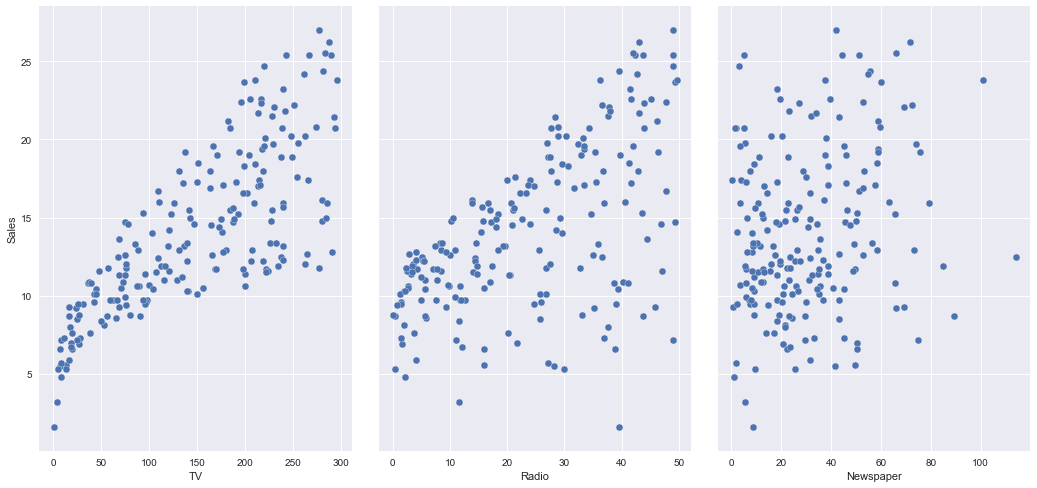

In [5]:
sns.pairplot(df_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

Define predictor variable and outcome variable.

In [6]:
X = df_data.loc[: , "TV"].values
Y = df_data.loc[: , "Sales"].values

### Spedify & fit the model

In [9]:
# Instantiate new model container.
lin_reg_model = pm.Model() 

# Specify model.
with lin_reg_model:

    # Define a-priori probability distributions for unknown model parameters.
    intercept = pm.Normal(     'Intercept', mu=0, sd=20)          # intercept
    beta      = pm.Normal(     'beta',      mu=0, sd=20)          # coefficients
    sigma     = pm.HalfCauchy( 'sigma',     beta=10, testval=1.)  # variance of predicted value
    
    # Expected value of outcome.
    mu = intercept + beta*X
    
    # Likelihood (sampling distribution) of observations.
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
    # Inference.
    trace = pm.sample(3000) # draw 3000 posterior samples using NUTS sampling
    
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -537.05: 100%|██████████| 200000/200000 [00:11<00:00, 17162.78it/s]   
Finished [100%]: Average ELBO = -537.05
100%|██████████| 3000/3000 [00:04<00:00, 670.07it/s]


### Analyze the model

In [10]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.041            0.483            0.018            [6.101, 7.965]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  6.114          6.712          7.038          7.357          7.989


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.047            0.003            0.000            [0.042, 0.053]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.042          0.046          0.047          0.049          0.053


sigma:

  Mean             SD               MC Error         95% HPD interval
  ----------------------

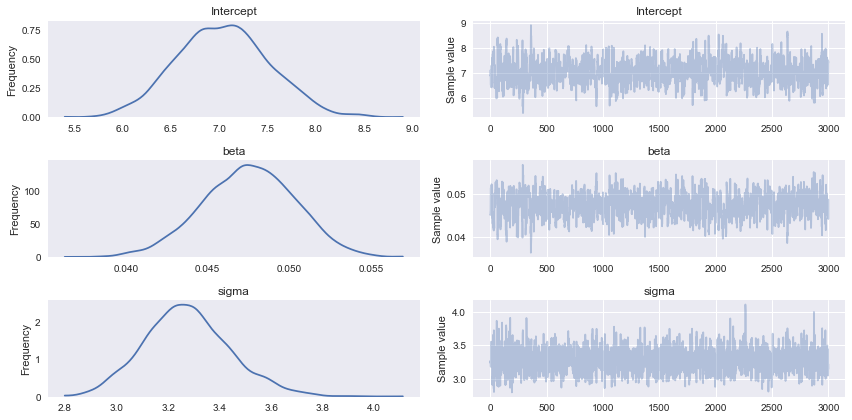

In [11]:
_ = pm.traceplot(trace)

Plot the posterior predictive distribution.

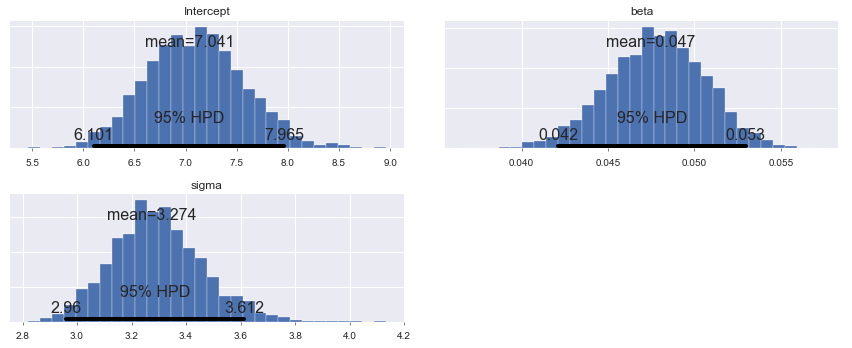

In [28]:
_ = pm.plot_posterior(trace)